In [2]:
import ROOT
import numpy as np
import time as time

# Count the time
start_time = time.time()

# Load the file and get the tree
f = ROOT.TFile.Open("SiHitValid_s3654.root", "READ")
tree = f.Get("SiHGTD")
print("The loaded tree 'hgtdHits' contains %d events" % tree.GetEntries())

# Print out the objects and branches
f.ls()
tree.Print()  

# Create histograms
histo_hits = ROOT.TH1F("Hits histo", "HGTD hits vs eta; |eta|; Number of hits", 50, 2.39, 2.81) 
histo_per_interaction = ROOT.TH1F("Hits per event", "HGTD hits per interaction; Interaction; Number of hits", 100, 0., 100.) 

eventCount = 0
printDetailsEventMax=100

# Number of hits that fall inside the acceptance conditions
hits_per_interaction = []

# Loop through each event in the tree
for event in tree:
    
    printEventDetails = (eventCount < printDetailsEventMax) 
    print("eventCount = %d, printEventDetails = %s" % (eventCount, str(printEventDetails)))
    
    hits_count = 0
    if printEventDetails:
        print("--->Number of HGTD hits: %d" % len(event.HGTD_x)) 
        print ("Looping through all the Hits...")
        # For each event, loop threough every hit and check acceptance conditions
        for h in range (len(event.HGTD_x)):
            r = event.HGTD_r[h] #radial coordinate of the hit 
            z = event.HGTD_z[h] #zeta coordinate (along beamline) of the hit
            eta = -np.log((r/z)/2) 
            if abs(eta) > 2.4 and abs(eta) < 2.8: #acceptance on the detector 
                hits_count += 1
                histo_hits.Fill(eta)
                
    print("Hits inside acceptance: %d"%hits_count)
    hits_per_interaction.append(hits_count)
    histo_per_interaction.Fill(hits_per_interaction[eventCount])
    eventCount += 1 
    
hours, rem = divmod(time.time()-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("Computation done!\nCPU time: %d hours, %d minutes and %d seconds" %(hours, minutes,seconds))

The loaded tree 'hgtdHits' contains 100 events
eventCount = 0, printEventDetails = True
--->Number of HGTD hits: 1564
Looping through all the Hits...
Hits inside acceptance: 214
eventCount = 1, printEventDetails = True
--->Number of HGTD hits: 1470
Looping through all the Hits...
Hits inside acceptance: 167
eventCount = 2, printEventDetails = True
--->Number of HGTD hits: 2679
Looping through all the Hits...
Hits inside acceptance: 474
eventCount = 3, printEventDetails = True
--->Number of HGTD hits: 1257
Looping through all the Hits...
Hits inside acceptance: 244
eventCount = 4, printEventDetails = True
--->Number of HGTD hits: 2243
Looping through all the Hits...
Hits inside acceptance: 181
eventCount = 5, printEventDetails = True
--->Number of HGTD hits: 2046
Looping through all the Hits...
Hits inside acceptance: 184
eventCount = 6, printEventDetails = True
--->Number of HGTD hits: 2512
Looping through all the Hits...
Hits inside acceptance: 332
eventCount = 7, printEventDetails = 

<ipython-input-2-48c44761cb56>:42: RuntimeWarning: invalid value encountered in log
  eta = -np.log((r/z)/2)


Hits inside acceptance: 251
eventCount = 21, printEventDetails = True
--->Number of HGTD hits: 2957
Looping through all the Hits...
Hits inside acceptance: 247
eventCount = 22, printEventDetails = True
--->Number of HGTD hits: 2373
Looping through all the Hits...
Hits inside acceptance: 406
eventCount = 23, printEventDetails = True
--->Number of HGTD hits: 1557
Looping through all the Hits...
Hits inside acceptance: 307
eventCount = 24, printEventDetails = True
--->Number of HGTD hits: 2025
Looping through all the Hits...
Hits inside acceptance: 236
eventCount = 25, printEventDetails = True
--->Number of HGTD hits: 1510
Looping through all the Hits...
Hits inside acceptance: 220
eventCount = 26, printEventDetails = True
--->Number of HGTD hits: 2893
Looping through all the Hits...
Hits inside acceptance: 360
eventCount = 27, printEventDetails = True
--->Number of HGTD hits: 1417
Looping through all the Hits...
Hits inside acceptance: 434
eventCount = 28, printEventDetails = True
--->Nu

Hits inside acceptance: 160
eventCount = 86, printEventDetails = True
--->Number of HGTD hits: 2333
Looping through all the Hits...
Hits inside acceptance: 133
eventCount = 87, printEventDetails = True
--->Number of HGTD hits: 1201
Looping through all the Hits...
Hits inside acceptance: 80
eventCount = 88, printEventDetails = True
--->Number of HGTD hits: 1611
Looping through all the Hits...
Hits inside acceptance: 237
eventCount = 89, printEventDetails = True
--->Number of HGTD hits: 2530
Looping through all the Hits...
Hits inside acceptance: 396
eventCount = 90, printEventDetails = True
--->Number of HGTD hits: 2577
Looping through all the Hits...
Hits inside acceptance: 316
eventCount = 91, printEventDetails = True
--->Number of HGTD hits: 5147
Looping through all the Hits...
Hits inside acceptance: 542
eventCount = 92, printEventDetails = True
--->Number of HGTD hits: 2413
Looping through all the Hits...
Hits inside acceptance: 483
eventCount = 93, printEventDetails = True
--->Num

392
[214, 167, 474, 244, 181, 184, 332, 114, 275, 149, 88, 49, 515, 204, 205, 452, 410, 150, 730, 437, 251, 247, 406, 307, 236, 220, 360, 434, 1017, 181, 426, 379, 129, 237, 813, 204, 321, 438, 510, 349, 116, 59, 186, 252, 340, 29, 299, 193, 11, 347, 118, 261, 100, 258, 62, 1075, 151, 135, 268, 183, 408, 208, 103, 26, 249, 382, 357, 415, 216, 447, 159, 510, 292, 452, 285, 740, 248, 129, 65, 279, 549, 37, 153, 7, 462, 160, 133, 80, 237, 396, 316, 542, 483, 90, 81, 716, 263, 458, 98, 392]


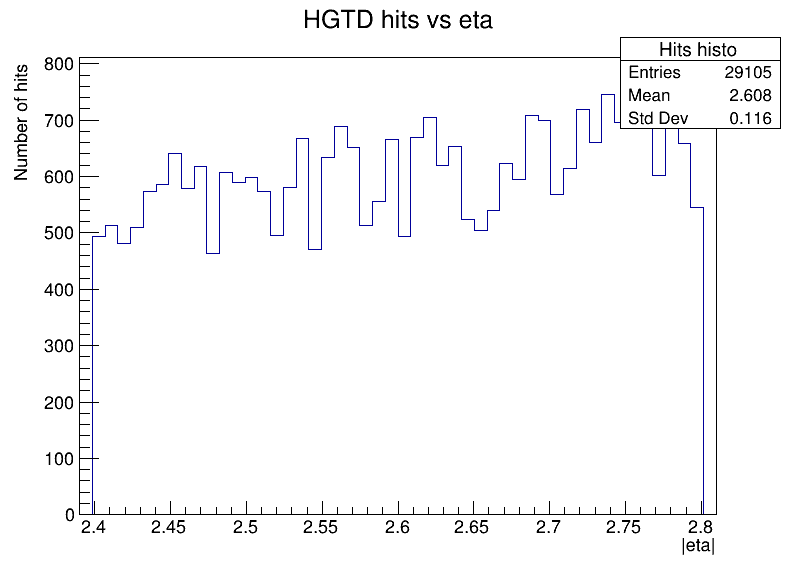

In [4]:
print (hits_count)
print (hits_per_interaction)

# open a canvas to draw the histogram on
c1 = ROOT.TCanvas("Canvas", "Title", 800, 600)
# draw the histogram
histo_hits.Draw() # draw option "e1" will draw error bars
# open the canvas
c1.Draw()


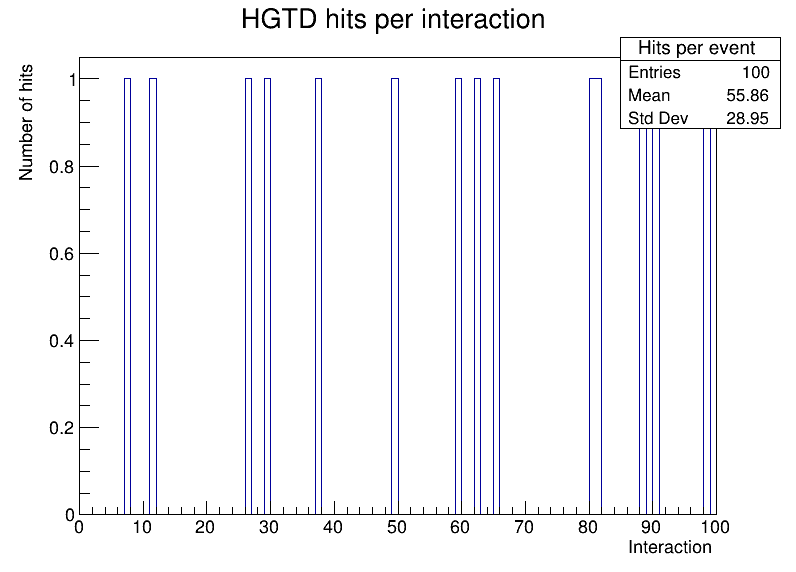

In [3]:
# open a canvas to draw the histogram on
c2 = ROOT.TCanvas("Canvas 2", "Title", 800, 600)
# draw the histogram
histo_per_interaction.Draw() # draw option "e1" will draw error bars
# open the canvas
c2.Draw()
